In [1]:
# -*- coding: utf-8 -*-

import os, re
import numpy as np
import pandas as pd
%matplotlib inline

In [26]:
# Global Variables
BASE_DIR = '../DATA/DATA_FOR_ANALYSIS/hESC_dME_dEC_dEN_interesected'
FIGURE_DIR = '../FIGURES'

DATA_TYPES = ["hESC", "dEC", "dME", "dEN", "K"]
GEO_IDS = ["GSM1112841", "GSM1112820", "GSM1112839", "GSM916051", "K"]

END_NAMES = {'Filtered By 0.5': '.inter_filtered', 'Original' : ".intersected"}
n_rows, n_cols = [len(DATA_TYPES), len(END_NAMES.keys())]

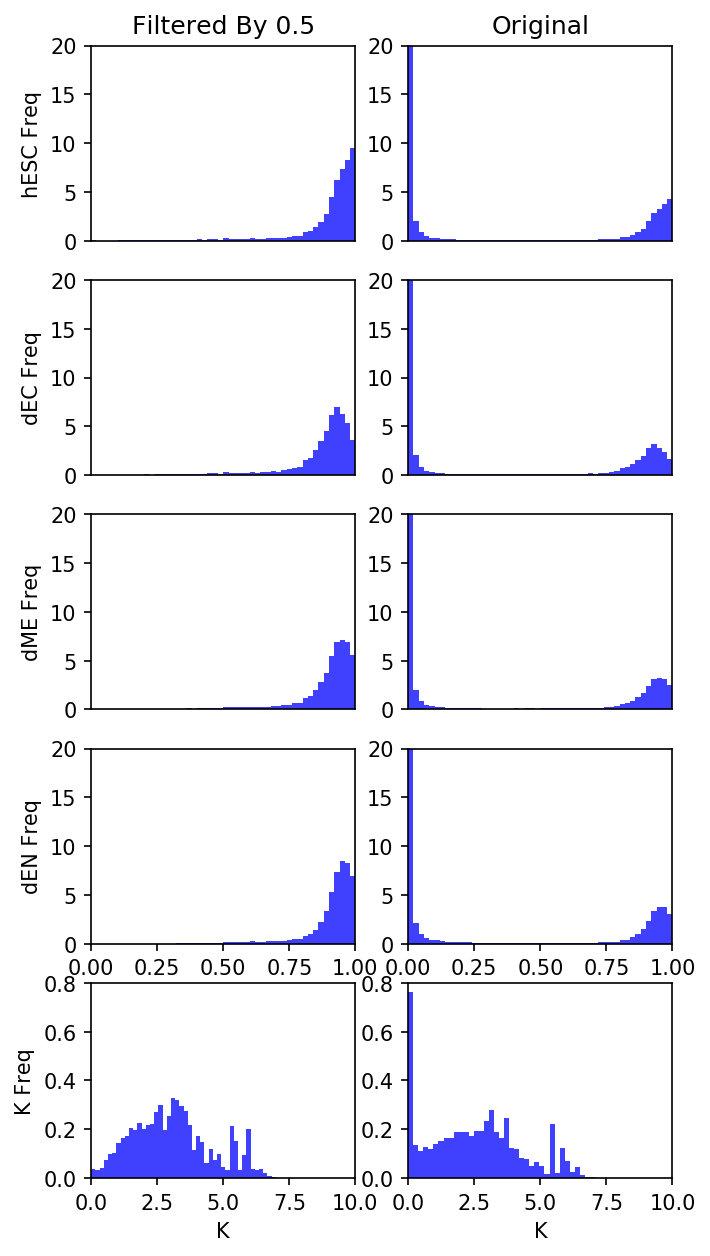

In [28]:

fig = plt.figure(num=1, figsize=(5, 10), dpi=150)

for col_index, key in enumerate(END_NAMES):
    end_name = END_NAMES[key]

    for row_index, geo_id in enumerate(GEO_IDS):
        data_frame = pd.read_csv(os.path.join(BASE_DIR, geo_id + '.bed' + end_name), sep='\s+', header=None)
        methylation_values = data_frame.iloc[:, 4].values
        fig_idx = row_index * len(END_NAMES.keys()) + col_index + 1
        plt.subplot(n_rows, n_cols, fig_idx)
        plt.hist(methylation_values, 50, density=True, facecolor='b', alpha=0.75)
        if row_index == len(DATA_TYPES) - 1:
            plt.xlabel('K')
            plt.xlim([0, 10])
            plt.ylim([0, 0.8])
        else:
            plt.xlim([0, 1])
            plt.ylim([0, 20])
            if row_index == len(DATA_TYPES) - 2:
                plt.xlabel('Methy level')
            else:
                plt.xticks([])
                if row_index == 0:
                    plt.title(key)
        if col_index == 0:
            plt.ylabel(DATA_TYPES[row_index] + ' Freq')
plt.savefig(os.path.join(FIGURE_DIR, 'Histogram.png'), dpi = fig.dpi)
plt.show()